In [17]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf  #  pip install yfinance

# Descargar datos de cotizaciones de la acción de Ecopetrol desde Yahoo Finance
ecopetrol = yf.download('EC', start='2013-01-01', end='2023-12-01')['Adj Close']

# Descargar datos de cotizaciones de la acción de Nutresa desde Yahoo Finance
nutresa = yf.download('NUTRESA.CL', start='2013-01-01', end='2023-12-01')['Adj Close']

# Descargar datos de cotizaciones de la acción de Bancolombia desde Yahoo Finance
bancolombia = yf.download('CIB', start='2013-01-01', end='2023-12-01')['Adj Close']

# Descargar datos de cotizaciones de la acción de ISA desde Yahoo Finance
isa = yf.download('ISA.CL', start='2013-01-01', end='2023-12-01')['Adj Close']

# Descargar datos de cotizaciones de la acción de Sura desde Yahoo Finance
sura = yf.download('GRUPOSURA.CL', start='2013-01-01', end='2023-12-01')['Adj Close']

# Descargar datos de cotizaciones de la acción de Promigas desde Yahoo Finance
promigas = yf.download('PROMIGAS.CL', start='2013-01-01', end='2023-12-01')['Adj Close']

# Descargar datos de cotizaciones de la acción de Cementos Argos desde Yahoo Finance
cementosargos = yf.download('CMTOY', start='2013-01-01', end='2023-12-01')['Adj Close']

# Descargar datos de cotizaciones de la acción de Terpel desde Yahoo Finance
terpel = yf.download('TERPEL.CL', start='2013-01-01', end='2023-12-01')['Adj Close']

# Descargar datos de cotizaciones de la acción de GEB desde Yahoo Finance
geb = yf.download('GEB.CL', start='2013-01-01', end='2023-12-01')['Adj Close']

# Descargar datos de cotizaciones de la acción de Éxito desde Yahoo Finance
exito = yf.download('EXITO.CL', start='2013-01-01', end='2023-12-01')['Adj Close']




# Crear un DataFrame combinando los datos
data = pd.DataFrame({'Ecopetrol': ecopetrol,
                    'Nutresa': nutresa,
                    'Bancolombia': bancolombia,
                    'ISA': isa,
                    'Sura': sura,
                    'Promigas': promigas,
                    'Cementos Argos': cementosargos,
                    'Terpel': terpel,
                    'GEB': geb,
                    'Exito': exito})

# Verificar los primeros registros del DataFrame
print(data.tail())




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

            Ecopetrol       Nutresa  Bancolombia           ISA          Sura  \
Date                                                                           
2023-11-24  10.485044  44920.730469    25.418123  14234.751953  30535.675781   
2023-11-27  10.493268  44607.757812    26.007103  14122.666992  30012.207031   
2023-11-28  10.583727  45104.828125    25.915073  14197.389648  29081.595703   
2023-11-29  10.452149  45104.828125    25.703409  14160.028320  29081.595703   
2023-11-30  10.369914  46006.929688    25.390516  14160.028320  29081.595703   

               Promigas  Cementos Argos       Terpel          GEB        Exito  
Date                                                                            
2023-11-24  3965.564697        6.028093  6312.071289  1557.508545  3500.083252  
2023-11-27  3941.560059        6.028093  6312.071289  1528.042236  3500.083252  
2023-11-28  3941.560059        6.028093  6438.312500  1519.623169  3500.083252  
2023-11-29  3955.962891        6.0

## Percentiles

In [18]:
# Realizo un análisis estadístico del DataFrame

data_summary = data.describe()
print(data_summary)

         Ecopetrol       Nutresa  Bancolombia           ISA          Sura  \
count  2748.000000   2841.000000  2748.000000   2839.000000   2844.000000   
mean      9.195153  23471.164196    27.993728  11633.759218  29533.429034   
std       4.529940   9172.725863     5.977197   5074.288834   5608.309834   
min       2.588103  14159.204102    12.061018   4056.787354  13120.187500   
25%       6.165998  18858.164062    23.389374   6680.802734  27987.764648   
50%       8.154276  20030.669922    26.991302  10641.953125  30440.932617   
75%      10.652360  21433.294922    32.958542  15942.009766  32764.753906   
max      24.876389  57300.222656    41.358700  24233.003906  53680.039062   

           Promigas  Cementos Argos       Terpel          GEB        Exito  
count   2843.000000     2748.000000  2417.000000  2839.000000  2842.000000  
mean    4393.758278        9.999659  6419.339744  1112.129651  4336.393544  
std     1693.351632        4.722510  1114.082518   334.989096  1284.753985 

## Estudio de valores nulos

In [19]:
# Calculo la cantidad de valores nulos por columna
null_values = data.isnull().sum()

# Muestro los resultados
print("Cantidad de valores nulos por columna:")
print(null_values)

Cantidad de valores nulos por columna:
Ecopetrol         100
Nutresa             7
Bancolombia       100
ISA                 9
Sura                4
Promigas            5
Cementos Argos    100
Terpel            431
GEB                 9
Exito               6
dtype: int64


## Procesamiento de valores nulos

In [20]:
import pandas as pd

# Calculo la interpolación lineal para reemplazar los valores nulos con los valores anterior y siguiente
data_filled = data.interpolate(method='linear', limit_direction='both')

# Identifico las posiciones de los valores nulos
null_positions = data.isnull()

# Itero sobre cada columna, excluyendo las columnas no numéricas
for column in data.columns:
    if data[column].dtype != 'object':  # Verifica si la columna es numérica
        # Reemplazo los valores nulos con el promedio de los valores anterior y siguiente al nulo
        data_filled[column][null_positions[column]] = data_filled[column].fillna(method='ffill').rolling(window=11, min_periods=1, center=True).mean()[null_positions[column]]

# Verifico si todavía existen valores nulos después del proceso de interpolación
print(pd.isnull(data_filled).any())

Ecopetrol         False
Nutresa           False
Bancolombia       False
ISA               False
Sura              False
Promigas          False
Cementos Argos    False
Terpel            False
GEB               False
Exito             False
dtype: bool


C:\Users\Andres\AppData\Local\Temp\ipykernel_11980\223474087.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_filled[column][null_positions[column]] = data_filled[column].fillna(method='ffill').rolling(window=11, min_periods=1, center=True).mean()[null_positions[column]]
C:\Users\Andres\AppData\Local\Temp\ipykernel_11980\223474087.py:13: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` in

In [21]:
# Verifico si hay valores nulos en data_filled
if data_filled.isnull().any().any():
    print("Todavía hay valores nulos en data_filled.")
else:
    print("No hay valores nulos en data_filled.")

No hay valores nulos en data_filled.


## Normalizar datos

In [22]:
from sklearn.preprocessing import MinMaxScaler

# Creo un objeto MinMaxScaler
scaler = MinMaxScaler()
data = data_filled

# Excluyo la columna "city" de la normalización
columns_to_normalize = data.columns.difference(["Date"])

# Normalizo los datos
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

print(data.head())

            Ecopetrol   Nutresa  Bancolombia       ISA      Sura  Promigas  \
Date                                                                         
2013-01-01   0.967840  0.095334     0.962423  0.137515  0.427866  0.840817   
2013-01-02   0.970435  0.094668     0.944935  0.137515  0.414026  0.840817   
2013-01-03   0.971835  0.090336     0.967162  0.137515  0.417585  0.840817   
2013-01-04   0.971660  0.095001     0.974570  0.139984  0.417585  0.840817   
2013-01-07   0.966936  0.095001     0.980978  0.139984  0.417585  0.840817   

            Cementos Argos    Terpel       GEB     Exito  
Date                                                      
2013-01-01             1.0  0.824485  0.000000  0.958505  
2013-01-02             1.0  0.824485  0.016182  0.958505  
2013-01-03             1.0  0.824485  0.033983  0.962727  
2013-01-04             1.0  0.824485  0.035601  1.000000  
2013-01-07             1.0  0.824485  0.035601  1.000000  


## Outliers

Outliers en Ecopetrol:
            Ecopetrol   Nutresa  Bancolombia       ISA      Sura  Promigas  \
Date                                                                         
2013-01-01   0.967840  0.095334     0.962423  0.137515  0.427866  0.840817   
2013-01-02   0.970435  0.094668     0.944935  0.137515  0.414026  0.840817   
2013-01-03   0.971835  0.090336     0.967162  0.137515  0.417585  0.840817   
2013-01-04   0.971660  0.095001     0.974570  0.139984  0.417585  0.840817   
2013-01-07   0.966936  0.095001     0.980978  0.139984  0.417585  0.840817   
...               ...       ...          ...       ...       ...       ...   
2013-12-09   0.682685  0.101296     0.605162  0.120832  0.357335  0.120750   
2013-12-10   0.679338  0.106640     0.596368  0.120110  0.359326  0.120750   
2013-12-11   0.681011  0.112059     0.585120  0.125162  0.369279  0.120750   
2013-12-12   0.676736  0.120187     0.582666  0.127328  0.379233  0.120750   
2013-12-13   0.678037  0.120526     0.586

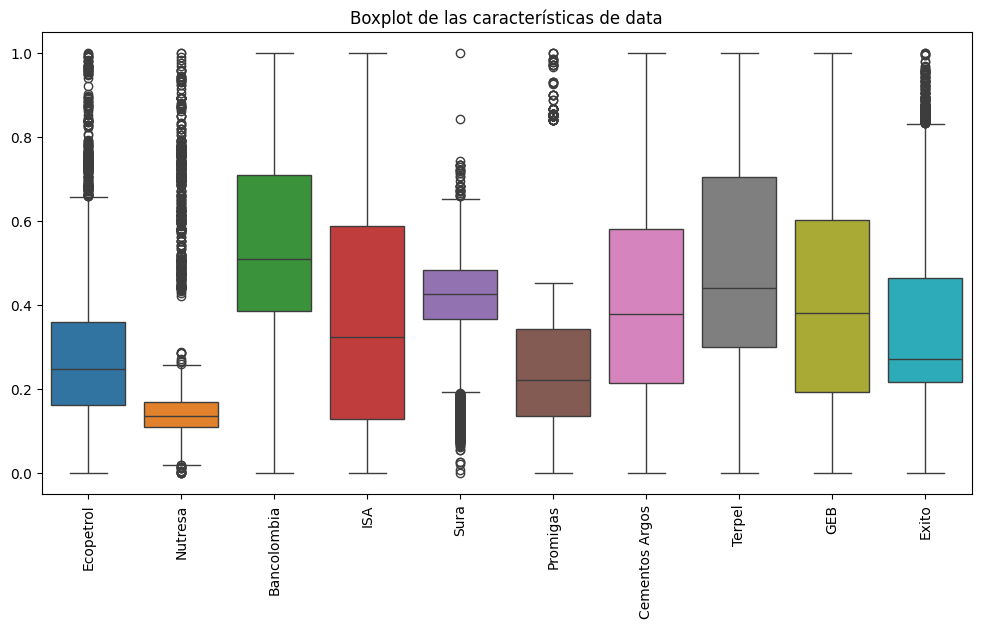

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# Definir la función para detectar outliers
def detect_outliers(df):
    outliers = {}
    for column in df.columns:
        if df[column].dtype != 'object' and column != 'Date':
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detectar outliers en data
outliers = detect_outliers(data)

# Imprimir los outliers detectados
for column, outlier_data in outliers.items():
    print(f"Outliers en {column}:\n{outlier_data}\n")

# Graficar boxplots para ver outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.title('Boxplot de las características de data')
plt.show()


In [24]:
# Detecto outliers en el DataFrame
outliers = detect_outliers(data)

# Reemplazo outliers con interpolación entre el dato anterior y siguiente
for column, df_outliers in outliers.items():
    null_positions = df_outliers.isnull()
    for col in df_outliers.columns:
        if col != "city":
            # Interpolación entre el dato anterior y el dato siguiente
            df_outliers[col] = df_outliers[col].interpolate(method='linear', limit_direction='both')


# Verifico si aún hay valores nulos después del reemplazo
for column, df_outliers in outliers.items():
    null_values_exist = pd.isnull(df_outliers).any().any()  # Evalùo si hay algún valor True en la Serie
    if null_values_exist:
        print(f"Valores nulos en la columna '{column}':")
        print(null_values_exist)
    else:
      print(f"No detecto más valores nulos en la columna '{column}'")

No detecto más valores nulos en la columna 'Ecopetrol'
No detecto más valores nulos en la columna 'Nutresa'
No detecto más valores nulos en la columna 'Bancolombia'
No detecto más valores nulos en la columna 'ISA'
No detecto más valores nulos en la columna 'Sura'
No detecto más valores nulos en la columna 'Promigas'
No detecto más valores nulos en la columna 'Cementos Argos'
No detecto más valores nulos en la columna 'Terpel'
No detecto más valores nulos en la columna 'GEB'
No detecto más valores nulos en la columna 'Exito'


C:\Users\Andres\AppData\Local\Temp\ipykernel_11980\1849163181.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outliers[col] = df_outliers[col].interpolate(method='linear', limit_direction='both')


## Diagrama de dispersión 2 a 2

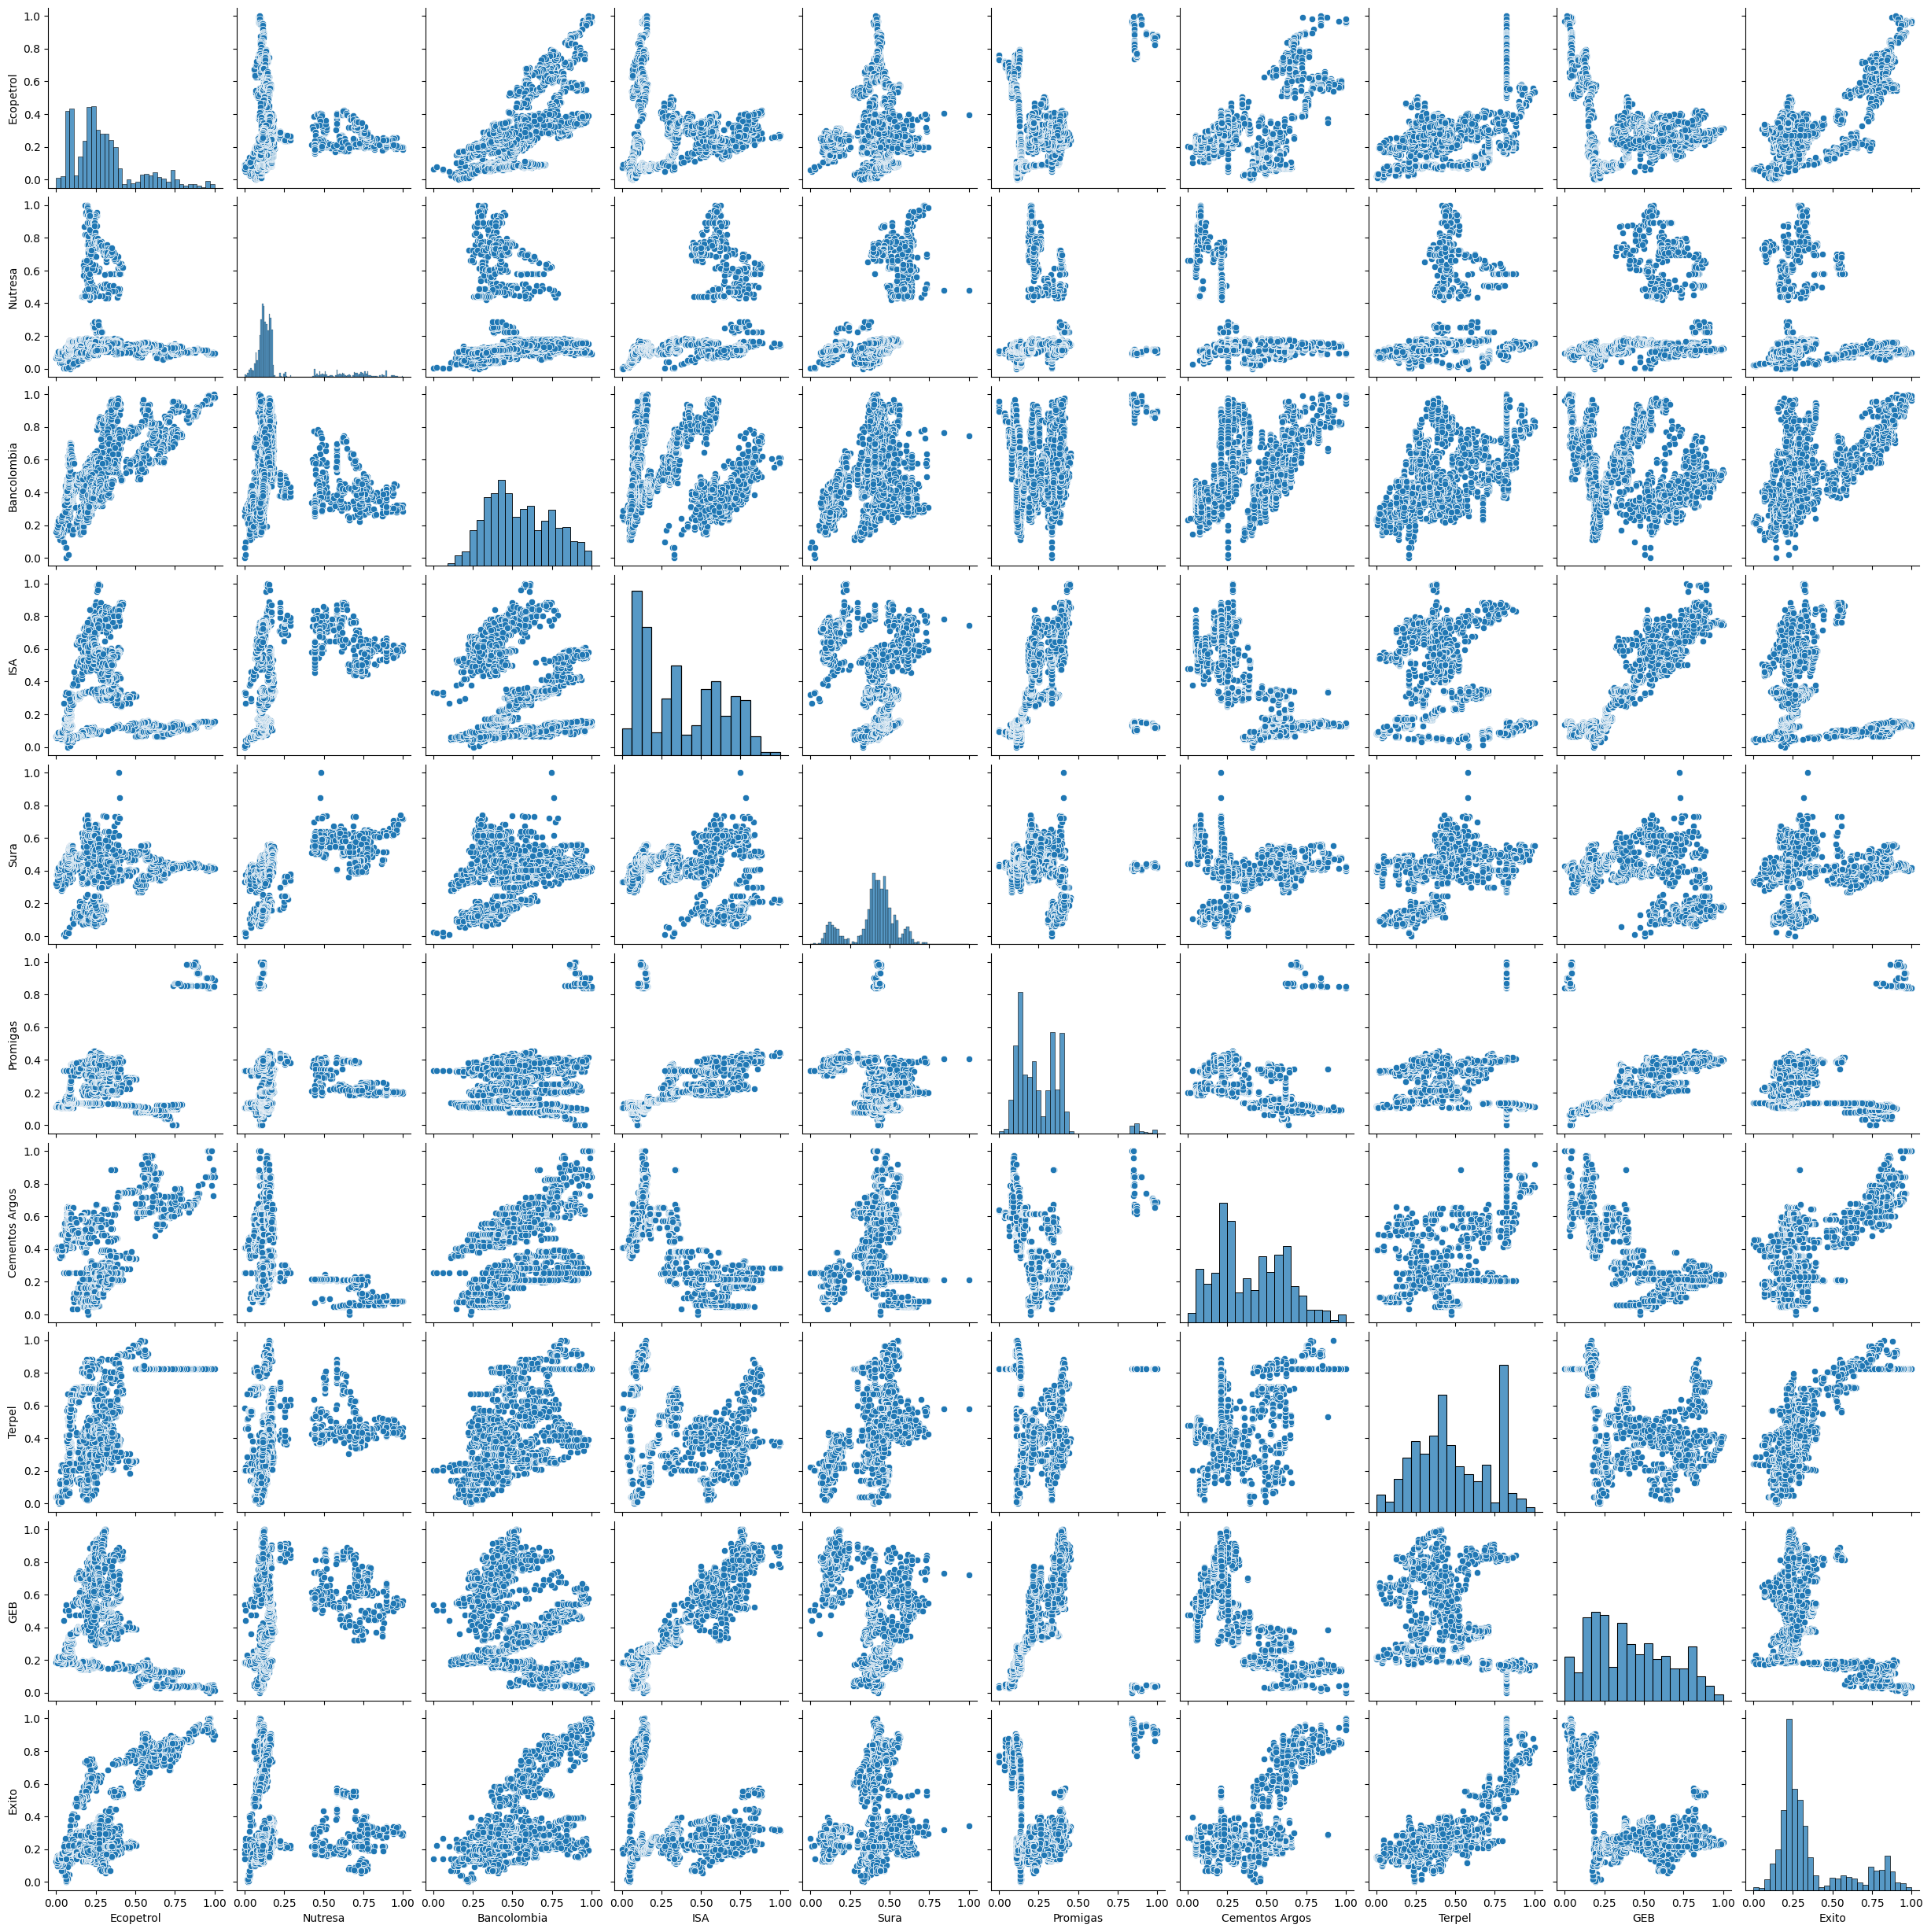

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecciono las características que deseo graficar
features = data.columns

# Creo una matriz de gráficos de dispersión
sns.pairplot(data[features])
plt.show()

## Matriz de correlaciones

In [26]:
import pandas as pd

# Calculo la matriz de correlaciones
correlation_matrix = data.corr()

# Imprimo mi matriz de correlaciones
print(correlation_matrix)

                Ecopetrol   Nutresa  Bancolombia       ISA      Sura  \
Ecopetrol        1.000000 -0.051322     0.702547 -0.177432  0.041369   
Nutresa         -0.051322  1.000000    -0.196527  0.480658  0.499614   
Bancolombia      0.702547 -0.196527     1.000000 -0.188455  0.249079   
ISA             -0.177432  0.480658    -0.188455  1.000000 -0.245735   
Sura             0.041369  0.499614     0.249079 -0.245735  1.000000   
Promigas         0.262269  0.029919     0.213508  0.460289 -0.246329   
Cementos Argos   0.414044 -0.504285     0.484544 -0.776791  0.225802   
Terpel           0.632746 -0.002565     0.566554 -0.345945  0.331520   
GEB             -0.315094  0.384031    -0.299391  0.942249 -0.363338   
Exito            0.802460 -0.168490     0.598543 -0.439703  0.131777   

                Promigas  Cementos Argos    Terpel       GEB     Exito  
Ecopetrol       0.262269        0.414044  0.632746 -0.315094  0.802460  
Nutresa         0.029919       -0.504285 -0.002565  0.384031 

# Optimización del portafolio de inversión

In [27]:
import pandas as pd

# Asumiendo que ya tienes tu DataFrame 'data'

# Verificar si hay valores nulos en el DataFrame
nulos_totales = data.isnull().sum().sum()
hay_nulos = nulos_totales > 0

print(f"¿Hay valores nulos en el DataFrame? {hay_nulos}")
print(f"Cantidad total de valores nulos: {nulos_totales}")

# Verificar si hay valores nulos en cada columna
nulos_por_columna = data.isnull().sum()
print("Valores nulos por columna:")
print(nulos_por_columna)



¿Hay valores nulos en el DataFrame? False
Cantidad total de valores nulos: 0
Valores nulos por columna:
Ecopetrol         0
Nutresa           0
Bancolombia       0
ISA               0
Sura              0
Promigas          0
Cementos Argos    0
Terpel            0
GEB               0
Exito             0
dtype: int64


In [29]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize

# Suponiendo que 'data' es tu DataFrame ya cargado y preprocesado
# Calcular los rendimientos manualmente
precios = data.values
rendimientos = (precios[1:] - precios[:-1]) / precios[:-1]

# Crear un DataFrame de rendimientos con las fechas
fechas = data.index[1:]
data_rendimientos = pd.DataFrame(rendimientos, index=fechas, columns=data.columns)

# Calcular la media y la matriz de covarianza de los rendimientos
media_rendimientos = data_rendimientos.mean()
covarianza_rendimientos = data_rendimientos.cov()

# Definir la función objetivo para maximizar el Sharpe Ratio
def funcion_objetivo(pesos):
    retorno_portafolio = np.dot(pesos, media_rendimientos)
    riesgo_portafolio = np.sqrt(np.dot(pesos.T, np.dot(covarianza_rendimientos, pesos)))
    sharpe_ratio = retorno_portafolio / riesgo_portafolio
    return -sharpe_ratio  # Negativo porque minimize busca minimizar

# Restricciones y límites
restricciones = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
# Cambiar los límites para permitir que cada peso sea mínimo del 5%
limites = [(0.05, 1) for _ in range(len(data.columns))]

# Inicializar los pesos y realizar la optimización
pesos_iniciales = np.ones(len(data.columns)) / len(data.columns)
resultado = minimize(funcion_objetivo, pesos_iniciales, method='SLSQP', bounds=limites, constraints=restricciones)

# Obtener los pesos óptimos
pesos_optimos = resultado.x
pesos_df = pd.DataFrame(pesos_optimos, index=data.columns, columns=['Peso'])

# Calcular la serie de tiempo del portafolio
retornos_portafolio = np.dot(data_rendimientos, pesos_optimos)
isa = pd.Series(retornos_portafolio, index=fechas)

# Imprimir resultados
print("Pesos óptimos del portafolio:")
print(pesos_df)

print("\nSerie de tiempo del portafolio compuesto:")
serie_tiempo_portafolio = serie_tiempo_portafolio[1:]
print(serie_tiempo_portafolio)



Pesos óptimos del portafolio:
                Peso
Ecopetrol        0.1
Nutresa          0.1
Bancolombia      0.1
ISA              0.1
Sura             0.1
Promigas         0.1
Cementos Argos   0.1
Terpel           0.1
GEB              0.1
Exito            0.1

Serie de tiempo del portafolio compuesto:
Date
2013-01-03    0.109221
2013-01-04    0.016341
2013-01-07    0.000171
2013-01-08   -0.021489
2013-01-09    0.003018
                ...   
2023-11-24    0.003676
2023-11-27   -0.004569
2023-11-28    0.002213
2023-11-29    0.002310
2023-11-30    0.002477
Freq: B, Length: 2846, dtype: float64


C:\Users\Andres\AppData\Local\Temp\ipykernel_11980\2920053821.py:8: RuntimeWarning: divide by zero encountered in divide
  rendimientos = (precios[1:] - precios[:-1]) / precios[:-1]
C:\Users\Andres\AppData\Local\Temp\ipykernel_11980\2920053821.py:8: RuntimeWarning: invalid value encountered in divide
  rendimientos = (precios[1:] - precios[:-1]) / precios[:-1]
c:\Users\Andres\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\optimize\_numdiff.py:592: RuntimeWarning: invalid value encountered in subtract
  df = fun(x1) - f0


# Predicción

## Árboles de decisión

In [36]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd

# Asegurarse de que la serie de tiempo es un DataFrame con una columna
serie_tiempo_portafolio = pd.DataFrame(isa)

# Defino los parámetros a ajustar para la búsqueda aleatoria
random_param_dist = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Construyo el modelo de árbol de decisión
regressor = DecisionTreeRegressor(random_state=42)

# Búsqueda aleatoria
random_search = RandomizedSearchCV(regressor, random_param_dist, n_iter=100, cv=5, scoring='neg_mean_absolute_error', random_state=42)
random_search.fit(serie_tiempo_portafolio, serie_tiempo_portafolio.values.ravel())

# Obtengo los mejores hiperparámetros encontrados por la búsqueda aleatoria
best_random_params = random_search.best_params_

# Defino los parámetros a ajustar para la búsqueda en cuadrícula alrededor de los mejores hiperparámetros encontrados
grid_param_grid = {
    'max_depth': [best_random_params['max_depth'] - 1, best_random_params['max_depth'], best_random_params['max_depth'] + 1],
    'min_samples_split': [max(2, best_random_params['min_samples_split'] - 1), best_random_params['min_samples_split'], best_random_params['min_samples_split'] + 1],
    'min_samples_leaf': [max(1, best_random_params['min_samples_leaf'] - 1), best_random_params['min_samples_leaf'], best_random_params['min_samples_leaf'] + 1],
    'max_features': [None, 'sqrt', 'log2']
}

# Búsqueda en cuadrícula
grid_search = GridSearchCV(regressor, grid_param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(serie_tiempo_portafolio, serie_tiempo_portafolio.values.ravel())

# Obtengo el mejor modelo encontrado por la búsqueda en cuadrícula
best_grid_regressor = grid_search.best_estimator_

# Calculo el MAE utilizando validación cruzada en todo el conjunto de entrenamiento
mae_scores = -cross_val_score(best_grid_regressor, serie_tiempo_portafolio, serie_tiempo_portafolio.values.ravel(), cv=5, scoring='neg_mean_absolute_error')

# Calculo el MAE promedio
mae_mean = mae_scores.mean()

print("MAE promedio utilizando validación cruzada en el conjunto de entrenamiento:", mae_mean)

MAE promedio utilizando validación cruzada en el conjunto de entrenamiento: 68.53517883167216


## KNN

In [37]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score
import numpy as np
import pandas as pd

# Asegurarse de que la serie de tiempo es un DataFrame con una columna
serie_tiempo_portafolio = pd.DataFrame(serie_tiempo_portafolio)

# Fijo la semilla para reproducibilidad
np.random.seed(42)

# Parámetros para Randomized Search
param_dist_randomized = {
    'n_neighbors': np.arange(1, 30),
    'weights': ['uniform', 'distance']
}

# Constructor del modelo
knn = KNeighborsRegressor()

# Randomized Search para búsqueda general
random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_dist_randomized, n_iter=10, cv=5, random_state=42)
random_search.fit(serie_tiempo_portafolio, serie_tiempo_portafolio.values.ravel())

# Obtengo los mejores hiperparámetros encontrados por Randomized Search
best_params_randomized = random_search.best_params_

# Parámetros para Grid Search dentro de la región seleccionada por Randomized Search
param_grid_grid_search = {
    'n_neighbors': np.arange(best_params_randomized['n_neighbors'] - 5, best_params_randomized['n_neighbors'] + 6),
    'weights': ['uniform', 'distance']
}

# Grid Search dentro de la región seleccionada por Randomized Search
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid_grid_search, cv=5)
grid_search.fit(serie_tiempo_portafolio, serie_tiempo_portafolio.values.ravel())

# Obtengo los mejores hiperparámetros encontrados por Grid Search
best_params_grid_search = grid_search.best_params_

# Entreno el modelo con los mejores hiperparámetros encontrados por Grid Search
knn_best = KNeighborsRegressor(**best_params_grid_search)

# Calculo el error utilizando validación cruzada sobre el conjunto de entrenamiento
mae_scores = -cross_val_score(knn_best, serie_tiempo_portafolio, serie_tiempo_portafolio.values.ravel(), cv=5, scoring='neg_mean_absolute_error')

# Calculo el MAE promedio
mae_mean = mae_scores.mean()

print("MAE promedio utilizando validación cruzada en el conjunto de entrenamiento:", mae_mean)


MAE promedio utilizando validación cruzada en el conjunto de entrenamiento: 57.53878600964423


## Random Forest

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score
import numpy as np
import pandas as pd

# Supongamos que ya tienes el dataset serie_tiempo_portafolio como un DataFrame
# Si es una serie, conviértelo en DataFrame
serie_tiempo_portafolio = pd.DataFrame(serie_tiempo_portafolio)

# Fijo la semilla para reproducibilidad
np.random.seed(42)

# Hiperparámetros para la búsqueda aleatoria
random_param_dist = {
    'n_estimators': [2, 4, 8, 16, 32, 64],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [1.0, 'sqrt', 'log2']
}

# Modelo RandomForestRegressor
rf_regressor = RandomForestRegressor()

# Búsqueda aleatoria
random_search = RandomizedSearchCV(rf_regressor, random_param_dist, n_iter=100, cv=5, scoring='neg_mean_absolute_error', random_state=42)
random_search.fit(serie_tiempo_portafolio, serie_tiempo_portafolio.values.ravel())

# Mejores hiperparámetros encontrados
best_random_params = random_search.best_params_

# Hiperparámetros para la búsqueda en cuadrícula
grid_param_grid = {
    'n_estimators': [best_random_params['n_estimators'] - 10, best_random_params['n_estimators'], best_random_params['n_estimators'] + 10],
    'max_depth': [best_random_params['max_depth']],
    'min_samples_split': [best_random_params['min_samples_split']],
    'min_samples_leaf': [best_random_params['min_samples_leaf']],
    'max_features': [best_random_params['max_features']]
}

# Búsqueda en cuadrícula sobre la región seleccionada
grid_search = GridSearchCV(rf_regressor, grid_param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(serie_tiempo_portafolio, serie_tiempo_portafolio.values.ravel())

# Mejores hiperparámetros encontrados
best_grid_params = grid_search.best_params_

# Modelo final con los mejores hiperparámetros encontrados
final_rf_regressor = RandomForestRegressor(**best_grid_params)

# Calculo el error utilizando validación cruzada en el conjunto de entrenamiento
mae_scores = -cross_val_score(final_rf_regressor, serie_tiempo_portafolio, serie_tiempo_portafolio.values.ravel(), cv=5, scoring='neg_mean_absolute_error')

# Calculo el MAE promedio
mae_mean = mae_scores.mean()
print("MAE promedio utilizando validación cruzada en el conjunto de entrenamiento:", mae_mean)

MAE promedio utilizando validación cruzada en el conjunto de entrenamiento: 65.49963107729542


## SVM